Clone the github **repository**

In [ ]:
!git clone https://github.com/KhurramShahzadODM/face_and_emotion_detection.git

Cloning into 'face_and_emotion_detection'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 49 (delta 6), reused 41 (delta 2), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [ ]:
!pip install face_recognition


In [ ]:
import shutil
import os
# clean and rebuild the image folders
input_folder = '/content/face_and_emotion_detection/inputs'
if os.path.exists(input_folder):
  shutil.rmtree(input_folder)
os.makedirs(input_folder)

output_folder = '/content/face_and_emotion_detection/outputs'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
os.makedirs(output_folder)

# upload images (PNG or JPG)
image_names = list(files.upload().keys())
for image_name in image_names:
  shutil.move(image_name, os.path.join(input_folder, image_name))


Saving trump_speech_short.mp4 to trump_speech_short.mp4


In [4]:
from imutils import paths
import os
import cv2
import numpy as np
from google.colab import files
import numpy as np
import face_recognition
from google.colab.patches import cv2_imshow
import imutils



imagePaths = list(paths.list_images('/content/face_and_emotion_detection/trump'))
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []
for (i, imagePath) in enumerate(imagePaths):
  # extract the person name from the image path
  print("[INFO] processing image {}/{}".format(i + 1,
    len(imagePaths)))
  name = imagePath.split(os.path.sep)[-2]
  # load the input image and convert it from BGR (OpenCV ordering)
  # to dlib ordering (RGB)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # rgb = cv2.resize(rgb, (512,640))
  rgb = imutils.resize(rgb, width=750)
  boxes = face_recognition.face_locations(rgb,model="cnn")
  encodings = face_recognition.face_encodings(rgb, boxes)
  for encoding in encodings:
    # add each encoding + name to our set of known names and
    # encodings
    knownEncodings.append(encoding)
    knownNames.append(name)

[INFO] processing image 1/11
[INFO] processing image 2/11
[INFO] processing image 3/11
[INFO] processing image 4/11
[INFO] processing image 5/11
[INFO] processing image 6/11
[INFO] processing image 7/11
[INFO] processing image 8/11
[INFO] processing image 9/11
[INFO] processing image 10/11
[INFO] processing image 11/11


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

emotions = {
    0: ['Angry', (0,0,255), (255,255,255)],
    1: ['Disgust', (0,102,0), (255,255,255)],
    2: ['Fear', (255,255,153), (0,51,51)],
    3: ['Happy', (153,0,153), (255,255,255)],
    4: ['Sad', (255,0,0), (255,255,255)],
    5: ['Surprise', (0,255,0), (255,255,255)],
    6: ['Neutral', (160,160,160), (255,255,255)]
}
num_classes = len(emotions)
input_shape = (48, 48, 1)
weights_1 = '/content/face_and_emotion_detection/model/vggnet.h5'

In [6]:
class VGGNet(Sequential):
    def __init__(self, input_shape, num_classes, checkpoint_path, lr=1e-3):
        super().__init__()
        self.add(Rescaling(1./255, input_shape=input_shape))
        self.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
        self.add(BatchNormalization())
        self.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(MaxPool2D())
        self.add(Dropout(0.5))

        self.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(MaxPool2D())
        self.add(Dropout(0.4))

        self.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(MaxPool2D())
        self.add(Dropout(0.5))

        self.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'))
        self.add(BatchNormalization())
        self.add(MaxPool2D())
        self.add(Dropout(0.4))

        self.add(Flatten())
        
        self.add(Dense(1024, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(256, activation='relu'))

        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(learning_rate=lr),
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])
        
        self.checkpoint_path = checkpoint_path
model_1 = VGGNet(input_shape, num_classes, weights_1)
model_1.load_weights(model_1.checkpoint_path)

1
(109, 452, 149, 413)


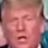

conf : 0.356318
label : Neutral
1
(109, 452, 149, 413)


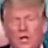

conf : 0.252022
label : Sad
1
(109, 452, 149, 413)


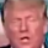

conf : 0.251422
label : Fear
1
(109, 452, 149, 413)


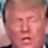

conf : 0.278785
label : Sad
0
0
0
0
0
0
1
(113, 452, 153, 413)


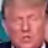

conf : 0.340668
label : Angry
0
0
0
0
1
(113, 448, 153, 409)


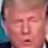

conf : 0.403741
label : Sad
1
(117, 448, 157, 409)


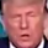

conf : 0.403885
label : Sad
1
(117, 444, 157, 405)


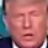

conf : 0.403822
label : Sad
1
(113, 444, 153, 405)


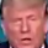

conf : 0.409517
label : Sad
1
(113, 440, 153, 401)


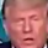

conf : 0.411986
label : Sad
1
(113, 440, 153, 401)


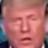

conf : 0.386145
label : Sad
1
(113, 436, 153, 397)


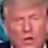

conf : 0.379412
label : Sad
1
(113, 436, 153, 397)


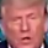

conf : 0.385966
label : Sad
1
(113, 432, 153, 393)


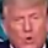

conf : 0.247355
label : Fear
1
(113, 432, 153, 393)


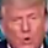

conf : 0.270340
label : Surprise
1
(113, 432, 153, 393)


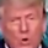

conf : 0.339299
label : Fear
1
(117, 428, 157, 389)


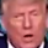

conf : 0.296890
label : Sad
1
(117, 428, 157, 389)


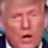

conf : 0.233240
label : Fear
1
(117, 424, 157, 385)


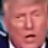

conf : 0.307621
label : Sad
2
(117, 424, 157, 385)


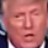

conf : 0.277445
label : Sad
1
(113, 424, 153, 385)


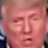

conf : 0.349559
label : Angry
1
(117, 424, 157, 385)


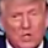

conf : 0.258610
label : Angry
2
(113, 424, 153, 385)


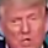

conf : 0.278762
label : Angry
1
(117, 424, 157, 385)


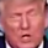

conf : 0.275225
label : Fear
2
(117, 424, 157, 385)


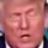

conf : 0.262530
label : Fear
2
(117, 424, 157, 385)


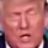

conf : 0.266037
label : Fear
2
(121, 556, 161, 517)


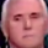

conf : 0.481507
label : Neutral
2
(113, 420, 153, 381)


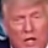

conf : 0.412732
label : Sad
2
(117, 568, 157, 529)


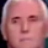

conf : 0.455749
label : Neutral
2
(113, 420, 153, 381)


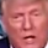

conf : 0.348616
label : Sad
2
(113, 420, 153, 381)


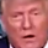

conf : 0.289924
label : Sad
2
(117, 584, 157, 545)


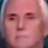

conf : 0.487360
label : Neutral
2
(109, 420, 149, 381)


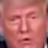

conf : 0.347769
label : Fear
2
(109, 416, 149, 377)


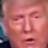

conf : 0.360342
label : Fear
2
(109, 416, 149, 377)


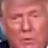

conf : 0.370515
label : Sad
2
(109, 416, 149, 377)


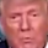

conf : 0.304256
label : Fear
2
(105, 412, 145, 373)


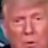

conf : 0.326091
label : Fear
2
(105, 412, 145, 373)


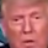

conf : 0.453673
label : Fear
2
(105, 412, 145, 373)


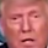

conf : 0.531984
label : Fear
2
(113, 600, 153, 561)


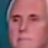

conf : 0.495427
label : Neutral
2
(113, 604, 153, 565)


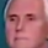

conf : 0.419039
label : Neutral
2
(101, 408, 141, 369)


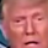

conf : 0.567765
label : Sad
2
(101, 408, 141, 369)


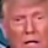

conf : 0.421763
label : Sad
2
(101, 408, 141, 369)


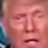

conf : 0.553714
label : Fear
2
(109, 608, 149, 569)


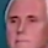

conf : 0.383454
label : Sad
2
(109, 608, 149, 569)


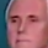

conf : 0.400828
label : Neutral
2
(113, 608, 153, 569)


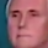

conf : 0.457646
label : Neutral
2
(97, 412, 137, 373)


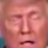

conf : 0.360555
label : Fear
2
(97, 412, 137, 373)


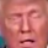

conf : 0.397970
label : Fear
2
(97, 412, 137, 373)


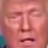

conf : 0.504292
label : Sad
2
(97, 412, 137, 373)


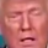

conf : 0.483680
label : Sad
2
(93, 412, 133, 373)


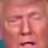

conf : 0.669707
label : Sad
2
(97, 412, 137, 373)


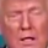

conf : 0.485309
label : Sad
2
(97, 412, 137, 373)


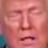

conf : 0.440664
label : Sad
2
(109, 612, 149, 573)


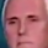

conf : 0.396494
label : Sad
2
(90, 413, 137, 366)


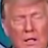

conf : 0.625263
label : Sad
2
(90, 413, 137, 366)


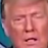

conf : 0.642097
label : Sad
2
(90, 413, 137, 366)


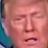

conf : 0.641349
label : Sad
2
(93, 412, 133, 373)


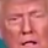

conf : 0.589340
label : Sad
2
(90, 418, 137, 371)


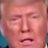

conf : 0.567902
label : Sad
2
(95, 418, 142, 371)


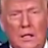

conf : 0.474785
label : Sad
2
(95, 418, 142, 371)


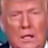

conf : 0.513703
label : Sad
2
(97, 416, 137, 377)


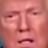

conf : 0.437037
label : Sad
2
(97, 416, 137, 377)


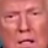

conf : 0.388421
label : Sad
2
(97, 416, 137, 377)


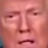

conf : 0.410788
label : Sad
2
(109, 632, 149, 593)


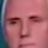

conf : 0.467899
label : Sad
2
(109, 636, 149, 597)


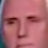

conf : 0.476039
label : Sad
2
(109, 636, 149, 597)


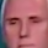

conf : 0.636160
label : Sad
2
(109, 636, 149, 597)


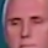

conf : 0.660052
label : Sad
2
(109, 640, 149, 601)


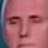

conf : 0.670054
label : Sad
2
(109, 644, 149, 605)


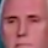

conf : 0.556015
label : Sad
2
(90, 413, 137, 366)


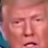

conf : 0.331120
label : Sad
2
(91, 421, 148, 364)


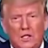

conf : 0.401527
label : Angry
2
(95, 413, 142, 366)


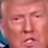

conf : 0.425729
label : Angry
2
(113, 652, 153, 613)


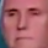

conf : 0.488925
label : Sad
2
(109, 652, 149, 613)


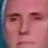

conf : 0.655352
label : Sad
2
(113, 656, 153, 617)


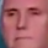

conf : 0.474248
label : Sad
2
(99, 413, 147, 366)


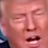

conf : 0.351446
label : Sad
2
(109, 660, 149, 621)


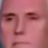

conf : 0.580677
label : Sad
2
(113, 660, 153, 621)


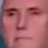

conf : 0.496626
label : Sad
2
(104, 418, 152, 371)


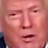

conf : 0.347854
label : Sad
2
(104, 418, 152, 371)


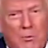

conf : 0.302292
label : Angry
2
(104, 418, 152, 371)


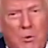

conf : 0.300560
label : Sad
2
(96, 421, 153, 364)


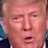

conf : 0.330548
label : Angry
2
(96, 421, 153, 364)


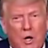

conf : 0.332951
label : Fear
2
(113, 664, 153, 625)


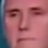

conf : 0.642175
label : Sad
2
(113, 668, 153, 629)


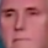

conf : 0.604787
label : Sad
2
(113, 668, 153, 629)


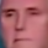

conf : 0.507771
label : Sad
2
(113, 668, 153, 629)


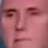

conf : 0.549235
label : Sad
2
(113, 668, 153, 629)


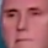

conf : 0.532445
label : Sad
2
(113, 668, 153, 629)


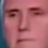

conf : 0.552909
label : Sad
2
(99, 408, 147, 361)


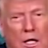

conf : 0.389933
label : Sad
2
(113, 672, 153, 633)


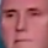

conf : 0.533687
label : Sad
2
(113, 672, 153, 633)


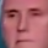

conf : 0.521203
label : Sad
2
(96, 410, 153, 353)


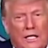

conf : 0.383830
label : Sad
2
(96, 416, 153, 359)


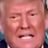

conf : 0.460950
label : Sad
2
(96, 416, 153, 359)


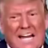

conf : 0.437798
label : Fear
2
(96, 416, 153, 359)


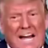

conf : 0.434613
label : Fear
2
(96, 416, 153, 359)


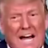

conf : 0.408456
label : Fear
2
(104, 682, 152, 635)


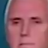

conf : 0.495081
label : Sad
2
(104, 687, 152, 639)


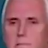

conf : 0.427314
label : Sad
2
(113, 684, 153, 645)


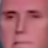

conf : 0.515058
label : Sad
2
(113, 684, 153, 645)


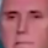

conf : 0.600219
label : Sad
2
(96, 416, 153, 359)


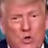

conf : 0.290370
label : Angry
2
(109, 692, 156, 644)


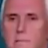

conf : 0.482462
label : Sad
2
(113, 688, 153, 649)


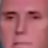

conf : 0.610441
label : Sad
2
(113, 688, 153, 649)


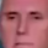

conf : 0.551700
label : Sad
2
(117, 688, 157, 649)


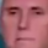

conf : 0.623785
label : Sad
2
(113, 688, 153, 649)


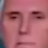

conf : 0.615005
label : Sad
2
(113, 688, 153, 649)


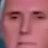

conf : 0.618312
label : Sad
2
(113, 688, 153, 649)


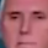

conf : 0.646901
label : Sad
2
(104, 692, 152, 644)


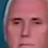

conf : 0.453312
label : Sad
2
(104, 692, 152, 644)


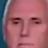

conf : 0.470002
label : Sad
2
(104, 692, 152, 644)


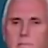

conf : 0.437119
label : Sad
2
(104, 692, 152, 644)


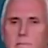

conf : 0.379521
label : Sad
2
(96, 404, 153, 347)


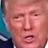

conf : 0.288546
label : Fear
2
(113, 684, 153, 645)


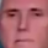

conf : 0.543237
label : Sad
2
(113, 680, 153, 641)


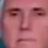

conf : 0.605097
label : Sad
2
(113, 680, 153, 641)


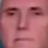

conf : 0.544347
label : Sad
2
(113, 676, 153, 637)


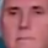

conf : 0.684501
label : Sad
2
(109, 676, 149, 637)


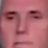

conf : 0.629760
label : Sad
2
(109, 672, 149, 633)


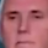

conf : 0.701007
label : Sad
2
(109, 672, 149, 633)


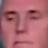

conf : 0.748783
label : Sad
2
(109, 668, 149, 629)


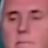

conf : 0.682242
label : Sad
2
(109, 668, 149, 629)


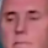

conf : 0.747489
label : Sad
2
(109, 664, 149, 625)


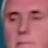

conf : 0.628047
label : Sad
2
(113, 664, 153, 625)


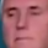

conf : 0.642835
label : Sad
2
(109, 664, 149, 625)


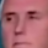

conf : 0.561463
label : Sad
2
(109, 660, 149, 621)


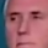

conf : 0.588035
label : Sad
2
(113, 660, 153, 621)


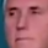

conf : 0.587133
label : Sad
2
(113, 660, 153, 621)


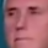

conf : 0.684950
label : Sad
2
(109, 663, 156, 615)


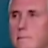

conf : 0.359911
label : Sad
2
(109, 663, 156, 615)


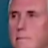

conf : 0.339084
label : Neutral
2
(109, 663, 156, 615)


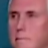

conf : 0.357424
label : Neutral
2
(109, 668, 156, 620)


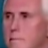

conf : 0.338197
label : Sad
2
(109, 663, 156, 615)


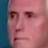

conf : 0.337009
label : Sad
2
(109, 668, 156, 620)


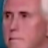

conf : 0.338140
label : Sad
2
(104, 663, 152, 615)


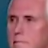

conf : 0.454968
label : Sad
2
(104, 663, 152, 615)


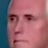

conf : 0.407690
label : Sad
2
(104, 663, 152, 615)


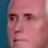

conf : 0.412070
label : Sad
2
(104, 663, 152, 615)


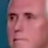

conf : 0.326756
label : Sad
2
(104, 663, 152, 615)


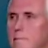

conf : 0.353744
label : Sad
2
(104, 663, 152, 615)


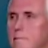

conf : 0.343908
label : Sad
2
(104, 663, 152, 615)


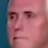

conf : 0.318043
label : Sad
2
(104, 663, 152, 615)


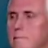

conf : 0.338656
label : Sad
2
(109, 656, 149, 617)


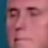

conf : 0.608002
label : Sad
2
(109, 656, 149, 617)


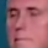

conf : 0.606797
label : Sad
2
(109, 656, 149, 617)


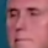

conf : 0.593939
label : Sad
2
(91, 404, 148, 347)


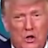

conf : 0.291130
label : Fear
2
(104, 663, 152, 615)


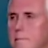

conf : 0.402066
label : Sad
2
(104, 668, 152, 620)


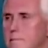

conf : 0.385193
label : Sad
2
(104, 668, 152, 620)


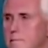

conf : 0.385916
label : Sad
2
(95, 408, 142, 361)


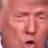

conf : 0.418230
label : Sad
2
(104, 668, 152, 620)


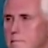

conf : 0.381921
label : Sad
2
(104, 668, 152, 620)


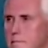

conf : 0.393136
label : Sad
2
(104, 668, 152, 620)


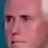

conf : 0.400008
label : Sad
2
(104, 668, 152, 620)


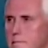

conf : 0.418760
label : Sad
2
(104, 668, 152, 620)


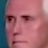

conf : 0.447790
label : Sad
2
(104, 668, 152, 620)


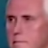

conf : 0.388306
label : Sad
2
(104, 668, 152, 620)


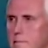

conf : 0.335434
label : Sad
2
(104, 668, 152, 620)


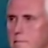

conf : 0.352054
label : Sad
2
(104, 668, 152, 620)


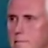

conf : 0.364370
label : Sad
2
(104, 672, 152, 625)


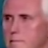

conf : 0.319960
label : Sad
2
(104, 672, 152, 625)


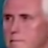

conf : 0.341257
label : Sad
2
(104, 672, 152, 625)


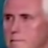

conf : 0.339072
label : Sad
2
(104, 672, 152, 625)


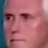

conf : 0.333951
label : Sad
2
(104, 672, 152, 625)


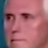

conf : 0.340520
label : Sad
2
(104, 672, 152, 625)


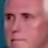

conf : 0.339068
label : Sad
2
(104, 672, 152, 625)


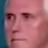

conf : 0.335812
label : Sad
2
(104, 672, 152, 625)


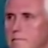

conf : 0.359933
label : Sad
2
(104, 672, 152, 625)


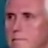

conf : 0.342759
label : Sad
2
(104, 672, 152, 625)


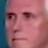

conf : 0.338542
label : Sad
2
(104, 672, 152, 625)


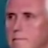

conf : 0.324951
label : Sad
2
(104, 672, 152, 625)


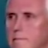

conf : 0.314073
label : Sad
2
(104, 672, 152, 625)


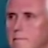

conf : 0.305068
label : Sad
2
(104, 672, 152, 625)


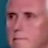

conf : 0.306344
label : Angry
2
(104, 672, 152, 625)


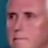

conf : 0.328425
label : Sad
2
(104, 672, 152, 625)


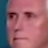

conf : 0.322085
label : Sad
2
(104, 672, 152, 625)


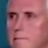

conf : 0.321593
label : Sad
2
(104, 672, 152, 625)


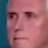

conf : 0.332396
label : Sad
2
(104, 672, 152, 625)


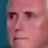

conf : 0.346375
label : Sad
2
(104, 672, 152, 625)


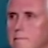

conf : 0.345100
label : Sad
2
(104, 672, 152, 625)


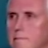

conf : 0.341957
label : Sad
2
(104, 672, 152, 625)


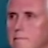

conf : 0.340038
label : Sad
2
(104, 672, 152, 625)


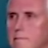

conf : 0.352775
label : Sad
2
(104, 672, 152, 625)


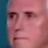

conf : 0.345040
label : Sad
2
(104, 672, 152, 625)


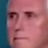

conf : 0.338895
label : Sad
2
(99, 413, 147, 366)


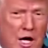

conf : 0.692316
label : Sad
2
(104, 672, 152, 625)


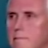

conf : 0.314318
label : Sad
2
(104, 672, 152, 625)


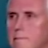

conf : 0.324283
label : Sad
2
(104, 672, 152, 625)


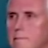

conf : 0.319311
label : Sad
2
(104, 672, 152, 625)


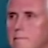

conf : 0.319160
label : Sad
2
(104, 672, 152, 625)


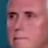

conf : 0.332920
label : Sad
2
(91, 410, 148, 353)


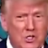

conf : 0.633891
label : Angry
2
(104, 672, 152, 625)


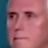

conf : 0.328151
label : Sad
2
(91, 410, 148, 353)


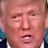

conf : 0.442474
label : Angry


KeyboardInterrupt: ignored

In [7]:

# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/face_and_emotion_detection/inputs/trump-1mint.mp4')
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}


# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
# img = cv2.imread('/content/face_and_emotion_detection/inputs/trump.jpg', cv2.IMREAD_COLOR)

# cv2_imshow(img)
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    # Display the resulting frame
    # cv2_imshow(frame)
    # frame = img
    # frame = cv2.resize(frame, (512,640))
    frame = imutils.resize(frame, width=750)

    faces = face_recognition.face_locations(frame,model="cnn")
    print(len(faces))
    # plt.imshow(face_image1)
    trump_face = 0
    for face in faces:
      # print(face)
      encoding_2 = face_recognition.face_encodings(frame, [face])
      matches = face_recognition.compare_faces(knownEncodings,encoding)
      # print(matches)
      # print(len(knownEncodings))
      # print(sum(matches))
      if sum(matches) > 0:
        trump_face = face
        break
    print(trump_face)
    if(trump_face != 0):
      top, right, bottom, left = trump_face
      face_image = frame[top:bottom, left:right]
      face_image = cv2.resize(face_image, (48,48))
      cv2_imshow(face_image)
      face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
      face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])
     
      y_1 = model_1.predict(face_image)

      l = np.argmax(y_1, axis=1)
      print('conf : '+ str(format(y_1[0][l[0]],'f')))
      print('label : ' + str(emotions[l[0]][0]))
      
      # model = load_model("/content/face_and_emotion_detection/model/model_v6_23.hdf5")
      # result = model.predict(face_image)
      # print(result)
      # predicted_class = np.argmax(result)
      # print(predicted_class)
      # print(format(result[0][predicted_class],'f'))
      # label_map = dict((v,k) for k,v in emotion_dict.items()) 
      # predicted_label = label_map[predicted_class]
      # print(predicted_label)


      # results = face_recognition.compare_faces(knownEncodings, encoding_2,tolerance=0.5)
      # print(results)
      # if(results[0]):
      #   print('trump is in the frame')
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [ ]:
!zip /content/face.zip /content/face_and_emotion_detection/*

  adding: content/face_and_emotion_detection/inputs/ (stored 0%)
  adding: content/face_and_emotion_detection/LICENSE (deflated 41%)
  adding: content/face_and_emotion_detection/model/ (stored 0%)
  adding: content/face_and_emotion_detection/outputs/ (stored 0%)
  adding: content/face_and_emotion_detection/README.md (deflated 4%)
  adding: content/face_and_emotion_detection/test_images/ (stored 0%)
  adding: content/face_and_emotion_detection/trump/ (stored 0%)
